# 体重データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
WEIGHTS_PATH = "../data/all_weights.csv"
CALORIES_PATH = "../data/all_calories.csv"
HEALTHPLANETS_PATH = "../data/all_healthplanets.csv"
weights = pd.read_csv(WEIGHTS_PATH)
calories= pd.read_csv(CALORIES_PATH)
hps = pd.read_csv(HEALTHPLANETS_PATH)
len(weights), len(calories), len(hps)

(133, 79, 20)

In [3]:
def func(x):
    try:
        return datetime.datetime.strptime(x.date, '%Y-%m-%d').strftime('%Y-%m-%d')
    except Exception:
        return datetime.datetime.strptime(x.date, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')

weights['date_index'] = weights.apply(func, axis=1)
calories['date_index'] = calories.apply(func, axis=1)
hps['date_index'] = hps.apply(func, axis=1)

weights['date_index'] = pd.to_datetime(weights.date_index)
calories['date_index'] = pd.to_datetime(calories.date_index)
hps['date_index'] = pd.to_datetime(hps.date_index)

weights = weights.set_index('date_index')
calories = calories.set_index('date_index')
hps = hps.set_index('date_index')

weights.index.name = 'date'
calories.index.name = 'date'
hps.index.name = 'date'

weights = weights.drop(['date'], axis=1)
calories = calories.drop(['date'], axis=1)
hps = hps.drop(['date'], axis=1)

In [4]:
weights = weights.groupby('date').mean()
hps = hps.groupby('date').mean()

In [5]:
df = pd.merge(weights, calories, how="outer", on="date")

hps = hps.drop(["weight"], axis=1)
df = pd.merge(df, hps, how="outer", on="date").sort_values('date')

len(df)

80

## データ分析

In [6]:
df["year"] = df.index.year
df["month"] = df.index.month
df["week_of_month"] = df.index.week
df["year_and_wom"] = df.index.strftime('%Y-W%W')

### 直近2週間

In [7]:
df_recent = pd.DataFrame()

In [8]:
df_recent["体重"] = round(df["weight"], 1)
df_recent["BMI"] = round(df["bmi"], 1)
df_recent["消費カロリー"] = df["calory"]
df_recent["摂取カロリー"] = df["calory_in"]
df_recent["運動カロリー"] = df["calory_activity"]

In [9]:
df_recent.tail(14)

,体重,BMI,消費カロリー,摂取カロリー,運動カロリー
date,,,,,
2020-02-05,93.9,32.1,3739.0,906.0,2253.0
2020-02-06,95.3,32.6,2601.0,1648.0,871.0
2020-02-07,95.2,32.6,1580.0,1443.0,0.0
2020-02-09,94.3,32.2,4365.0,993.0,2968.0
2020-02-10,94.2,32.2,4394.0,1963.0,3016.0
2020-02-11,93.6,32.0,4679.0,855.0,3327.0
2020-02-12,94.8,32.4,1862.0,711.0,0.0
2020-02-14,95.1,32.5,1707.0,172.0,0.0
2020-02-15,94.2,32.2,4393.0,1125.0,3013.0


### 週別の集計

In [10]:
groupby = df.groupby('year_and_wom')

In [11]:
df_by_week = pd.DataFrame()
df_by_week["体重"] = round(groupby["weight"].mean(), 1)
df_by_week["BMI"] = round(groupby["bmi"].mean(), 1)

In [12]:
df_by_week["消費カロリー"] = round(groupby["calory"].mean(), 1) * 7
df_by_week["摂取カロリー"] = round(groupby["calory_in"].mean(), 1) * 7
df_by_week["カロリー増減"] = (round(groupby["calory_in"].mean(), 1) - round(groupby["calory"].mean(), 1)) * 7
df_by_week["運動カロリー"] = round(groupby["calory_activity"].mean(), 1) * 7

In [13]:
df_by_week["増減"] = df_by_week.diff()["体重"]
df_by_week["総減量"] = 106 - df_by_week["体重"]

In [14]:
df_by_week["週番号"] = df_by_week.index
df_by_week["date"] = df_by_week["週番号"].apply(lambda x: datetime.datetime.strptime(x + '-0', "%Y-W%W-%w"))
df_by_week.set_index("date", inplace=True)

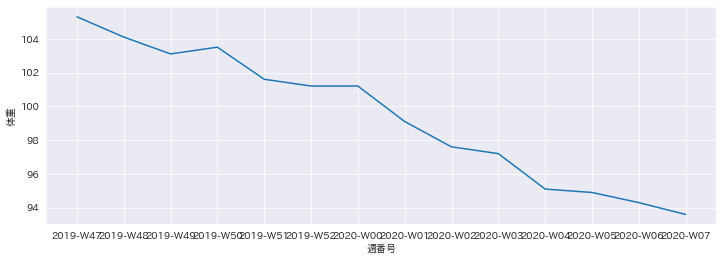

In [15]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_by_week, x='週番号', y='体重')

In [16]:
df_by_week.drop(["週番号"], axis=1, inplace=True)
df_by_week.index.name = '週別'

In [17]:
df_by_week = df_by_week.groupby("週別").mean()

In [18]:
df_by_week.tail(8)

,体重,BMI,消費カロリー,摂取カロリー,カロリー増減,運動カロリー,増減,総減量
週別,,,,,,,,
2020-01-05,101.2,34.6,21579.25,0.0,-21579.25,9462.6,-0.2,4.8
2020-01-12,99.1,33.9,25256.00,1057.0,-24199.00,14153.3,-2.1,6.9
2020-01-19,97.6,33.4,28797.30,7693.0,-21104.30,18718.7,-1.5,8.4
2020-01-26,97.2,33.3,26156.90,8806.0,-17350.90,15303.4,-0.4,8.8
2020-02-02,95.1,32.5,26576.20,6472.2,-20104.00,15955.8,-2.1,10.9
2020-02-09,94.9,32.5,22120.00,7339.5,-14780.50,11114.6,-0.2,11.1
2020-02-16,94.3,32.2,23944.90,7551.6,-16393.30,13111.0,-0.6,11.7
2020-02-23,93.6,32.0,24647.00,7516.6,-17130.40,13553.4,-0.7,12.4
